In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import sys
import cartopy.crs as ccrs

from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

In [2]:
leak_data_raw = pd.read_csv("EOG-Resources-Dataset-main/sensor_readings.csv")
leak_data_raw = leak_data_raw.iloc[:, 1:]
leak_data_raw.columns = ["Time","Sensor 1", "Sensor 2", "Sensor 3", "Sensor 4", "Sensor 5", "Sensor 6", "Sensor 7", "Sensor 8", "Sensor 9", "Sensor 10", "Sensor 11", "Sensor 12", "Sensor 13", "Sensor 14", "Sensor 15", "Sensor 16", "Sensor 17", "Sensor 18", "Sensor 19", "Sensor 20", "Sensor 21", "Sensor 22", "Sensor 23", "Sensor 24"]
pd.set_option("display.max_columns", 15)

leak_data_raw.describe()


,Time,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,...,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Sensor 22,Sensor 23,Sensor 24
count,8.341300e+04,83413.000000,83413.000000,83413.000000,83413.000000,8.341300e+04,8.341300e+04,...,83413.000000,83413.000000,83413.000000,83413.000000,83413.000000,83413.000000,83413.000000
mean,1.681818e+09,981.245046,1031.140302,1159.154922,953.869109,9.720851e+02,1.170478e+03,...,1008.238902,904.651427,1113.918862,1075.861808,1136.595746,1033.250303,1129.391737
std,2.478513e+04,67.952264,66.103792,122.729737,94.060993,5.011513e+03,3.836117e+04,...,100.934852,108.552279,97.508330,393.692215,103.736548,106.463880,85.912814
min,1.681776e+09,701.000000,755.000000,664.000000,611.000000,9.300000e+01,1.950000e+02,...,666.000000,617.000000,732.000000,682.000000,186.000000,630.000000,708.000000
25%,1.681797e+09,947.000000,1004.000000,1112.500000,926.000000,9.150000e+02,9.990000e+02,...,974.857143,867.000000,1083.000000,1027.000000,1090.000000,997.500000,1090.500000
50%,1.681818e+09,995.000000,1044.000000,1167.000000,965.000000,9.670000e+02,1.047000e+03,...,1023.000000,903.000000,1123.000000,1079.000000,1152.000000,1052.000000,1150.612903
75%,1.681839e+09,1021.500000,1069.000000,1205.000000,993.000000,1.004500e+03,1.084000e+03,...,1054.000000,931.000000,1155.000000,1114.000000,1193.000000,1083.000000,1179.000000
max,1.681862e+09,1745.000000,1701.000000,2649.000000,2184.000000,1.030022e+06,1.108021e+07,...,2755.000000,2632.000000,16392.000000,110084.000000,10351.000000,16379.000000,1682.000000


In [3]:
leak_data_raw

,Time,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,...,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Sensor 22,Sensor 23,Sensor 24
0,1681776002,1030.0,1049.0,1166.0,964.0,1023.0,1090.5,...,991.5,931.0,1040.0,1040.0,1111.0,1080.0,1089.0
1,1681776003,1033.0,1051.0,1163.0,974.0,993.0,1095.0,...,984.0,928.5,1043.0,1052.0,1105.5,1075.0,1095.0
2,1681776004,1022.0,1051.0,1160.0,975.5,974.0,1081.0,...,993.0,926.0,1039.0,1033.0,1100.0,1021.0,1093.0
3,1681776005,1034.0,1050.0,1165.0,977.0,988.0,1084.0,...,999.0,929.0,1047.5,1014.0,1107.0,1059.5,1110.0
4,1681776006,1037.5,1049.0,1155.0,977.0,971.0,1084.0,...,1004.5,944.0,1056.0,1019.0,1098.0,1098.0,1107.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83408,1681862395,853.0,901.0,990.0,813.0,791.0,911.0,...,900.5,795.0,1007.0,955.0,1020.0,949.0,987.0
83409,1681862396,852.5,899.0,1007.0,801.0,788.5,900.0,...,901.0,799.5,1009.0,954.0,1018.0,955.0,986.0
83410,1681862397,852.0,901.0,1011.0,811.0,786.0,909.0,...,908.0,804.0,1016.0,961.0,1017.0,938.0,982.0
83411,1681862398,859.0,912.0,1010.0,811.0,764.0,909.0,...,897.0,802.0,1019.0,963.0,1026.0,948.0,990.0


In [4]:
leak_data = leak_data_raw.copy()
leak_data['Total'] = leak_data.iloc[:,1:].sum(axis=1)
leak_data['Time'] -= 1681776002
leak_data.head()

,Time,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,...,Sensor 19,Sensor 20,Sensor 21,Sensor 22,Sensor 23,Sensor 24,Total
0,0,1030.0,1049.0,1166.0,964.0,1023.0,1090.5,...,931.0,1040.0,1040.0,1111.0,1080.0,1089.0,25204.5
1,1,1033.0,1051.0,1163.0,974.0,993.0,1095.0,...,928.5,1043.0,1052.0,1105.5,1075.0,1095.0,25186.0
2,2,1022.0,1051.0,1160.0,975.5,974.0,1081.0,...,926.0,1039.0,1033.0,1100.0,1021.0,1093.0,25082.0
3,3,1034.0,1050.0,1165.0,977.0,988.0,1084.0,...,929.0,1047.5,1014.0,1107.0,1059.5,1110.0,25172.5
4,4,1037.5,1049.0,1155.0,977.0,971.0,1084.0,...,944.0,1056.0,1019.0,1098.0,1098.0,1107.5,25176.0


/tmp/ipykernel_1515/3145724838.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s = sns.lineplot(x='Time', y='Total', data=leak_data, palette='viridis')
/home/siddharth/miniconda3/envs/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/siddharth/miniconda3/envs/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Total Concentration of CH4 (ppb)')

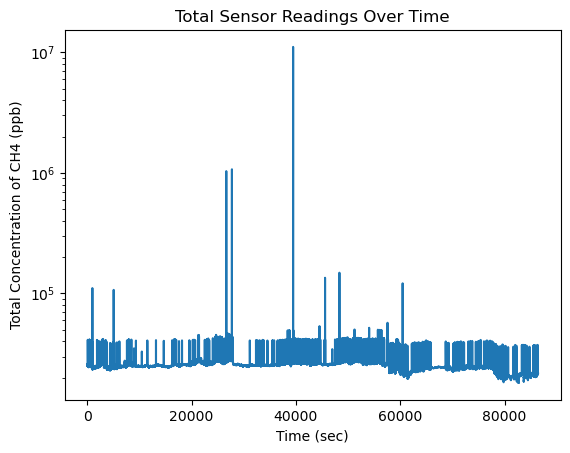

In [8]:
s = sns.lineplot(x='Time', y='Total', data=leak_data, palette='viridis')
s.set_yscale('log')
s.set_title('Total Sensor Readings Over Time')
s.set_xlabel('Time (sec)')
s.set_ylabel('Total Concentration of CH4 (ppb)')

Text(0, 0.5, 'Total Concentration of CH4 (ppb)')

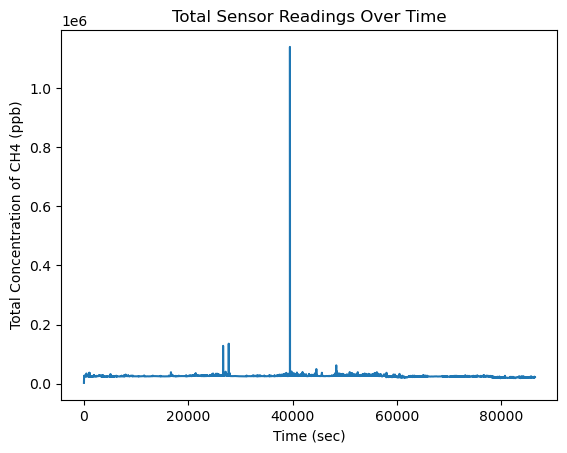

In [6]:
from scipy.signal import lfilter
plt.plot(leak_data['Time'], lfilter([1/10]*10, 1, leak_data['Total']))
plt.title('Total Sensor Readings Over Time')
plt.xlabel('Time (sec)')
plt.ylabel('Total Concentration of CH4 (ppb)')